All religions should be one.

# Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
from scipy.misc import imread
import base64

In [3]:
from pylab import figure, axes, pie, title, show
import warnings
import os

In [4]:
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', 100)

# Reading the Dataset

In [6]:
Religion = pd.read_csv('./regional.csv')

In [8]:
Religion.head()

,year,region,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,judaism_reform,judaism_other,judaism_all,islam_sunni,islam_shi’a,islam_ibadhi,islam_nationofislam,islam_alawite,islam_ahmadiyya,islam_other,islam_all,buddhism_mahayana,buddhism_theravada,buddhism_other,buddhism_all,zoroastrianism_all,hinduism_all,sikhism_all,shinto_all,baha’i_all,taoism_all,jainism_all,confucianism_all,syncretism_all,animism_all,noreligion_all,otherreligion_all,religion_all,population,world_population,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,christianity_percent,orthodox_percent,conservative_percent,reform_percent,otherjudaism_percent,judaism_percent,sunni_percent,shi’a_percent,ibadhi_percent,nationofislam_percent,alawite_percent,ahmadiyya_percent,otherislam_percent,islam_percent,mahayana_percent,theravada_percent,otherbuddhism_percent,buddhism_percent,zoroastrianism_percent,hinduism_percent,sikhism_percent,shinto_percent,baha’i_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,worldpopulation_percent
0,1945,Africa,2074180,672337,7251492,419457,4170594,14588060,0,0,0,80487,80487,0,0,0,0,0,0,5051475,5051475,0,0,53,53,0,137290,1536,0,2021,0,0,0,831,9162018,7396,41833,29065604,29073000,1617000000,0.0713,0.0231,0.2494,0.0144,0.1435,0.5018,0.000,0.0000,0.0000,0.0028,0.0028,0.0000,0.0000,0.0,0,0.0,0.0,0.1738,0.1738,0.0,0.0,0.0000,0.0000,0.0000,0.0047,0.0001,0.0000,0.0001,0.0000,0.0,0.0,0.0000,0.3151,0.0003,0.0014,0.9997,1.0000,0.0180
1,1945,Asia,2407144,2222908,181928,3142204,1964907,9919091,0,0,0,30369,30369,7451998,940000,0,0,0,0,27868347,36260345,0,0,113681431,113681431,2710,5230216,12525,55228775,7243,120950,0,0,423153390,22525760,30637661,152491,666325296,663450000,1617000000,0.0036,0.0034,0.0003,0.0047,0.0030,0.0150,0.000,0.0000,0.0000,0.0000,0.0000,0.0112,0.0014,0.0,0,0.0,0.0,0.0420,0.0547,0.0,0.0,0.1713,0.1713,0.0000,0.0079,0.0000,0.0832,0.0000,0.0002,0.0,0.0,0.6378,0.0340,0.0462,0.0002,1.0043,1.0505,0.4103
2,1945,Europe,83145512,216041422,86503645,29855595,5361826,420908000,0,0,0,6068020,6068020,0,0,0,0,0,0,29353397,29353397,0,0,725632,725632,0,21691,1748,0,6231,0,181,0,5896,1294177,99829250,2535777,460920750,560750000,1617000000,0.1483,0.3853,0.1543,0.0532,0.0096,0.7506,0.000,0.0000,0.0000,0.0108,0.0108,0.0000,0.0000,0.0,0,0.0,0.0,0.0523,0.0523,0.0,0.0,0.0013,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0023,0.1780,0.0045,0.8220,1.0000,0.3468
3,1945,Mideast,87174,635929,3180260,0,108332,4011695,0,0,0,623240,623240,41598322,18496742,0,0,0,0,0,60095064,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,561,478440,65218439,65219000,1617000000,0.0013,0.0098,0.0488,0.0000,0.0017,0.0615,0.000,0.0000,0.0000,0.0096,0.0096,0.6378,0.2836,0.0,0,0.0,0.0,0.0000,0.9214,0.0,0.0,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0073,1.0000,1.0000,0.0403
4,1945,West. Hem,73173575,171759439,1383846,3537777,2068807,251923444,856827,1426350,1929388,994719,5207284,0,0,0,0,0,0,0,0,0,0,1830820,1830820,0,0,5000,0,0,0,0,0,5500000,228125,23011662,6648385,271343058,289375655,1617000000,0.2529,0.5936,0.0048,0.0122,0.0071,0.8706,0.003,0.0049,0.0067,0.0034,0.0180,0.0000,0.0000,0.0,0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0063,0.0063,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0190,0.0008,0.0795,0.0230,0.9377,1.0172,0.1790


In [9]:
Religion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 78 columns):
year                            70 non-null int64
region                          70 non-null object
christianity_protestant         70 non-null int64
christianity_romancatholic      70 non-null int64
christianity_easternorthodox    70 non-null int64
christianity_anglican           70 non-null int64
christianity_other              70 non-null int64
christianity_all                70 non-null int64
judaism_orthodox                70 non-null int64
judaism_conservative            70 non-null int64
judaism_reform                  70 non-null int64
judaism_other                   70 non-null int64
judaism_all                     70 non-null int64
islam_sunni                     70 non-null int64
islam_shi’a                     70 non-null int64
islam_ibadhi                    70 non-null int64
islam_nationofislam             70 non-null int64
islam_alawite                   70 non-null in

In [11]:
Religion['year'].value_counts().head(20)

2010    5
2005    5
2000    5
1995    5
1990    5
1985    5
1980    5
1975    5
1970    5
1965    5
1960    5
1955    5
1950    5
1945    5
Name: year, dtype: int64

In [12]:
Religion['region'].value_counts().head(20)

Europe       14
Asia         14
West. Hem    14
Mideast      14
Africa       14
Name: region, dtype: int64

In [14]:
Religion['population'].value_counts().head(20)

728414000     1
560750000     1
289375655     1
1436233000    1
565658000     1
432444000     1
210887000     1
2013375984    1
799492401     1
603716000     1
102730000     1
560925800     1
745596883     1
65219000      1
845942719     1
486520000     1
2937844992    1
77683000      1
358220000     1
498934000     1
Name: population, dtype: int64

In [15]:
Religion['religion_all'].value_counts().head(20)

354313342     1
33687082      1
569770141     1
184322590     1
560565791     1
1320030368    1
609866242     1
285507000     1
460920750     1
613155338     1
550611759     1
666325296     1
443306418     1
1524692019    1
623246925     1
336312501     1
2975462044    1
393694745     1
831582993     1
255090697     1
Name: religion_all, dtype: int64

# Looking for NaN Values

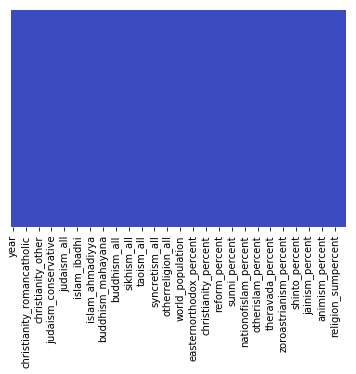

In [10]:
sns.heatmap(Religion.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Look's good. Let's move on to the visualizations.

# Religion by Africa

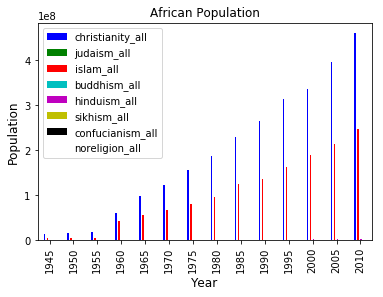

In [16]:
religionAll = Religion[['region','year','christianity_all','judaism_all','islam_all','buddhism_all','zoroastrianism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].copy() 
religionByAfrica = religionAll[religionAll['region']=="Africa"]

religionByAfrica.reset_index()
colors = ['b', 'g', 'r', 'c', 'm','y', 'k', 'w', '#FF0033', '#FF8833','#FF0088']
ax = religionByAfrica[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="African Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByAfrica['year'])

# Asian Population

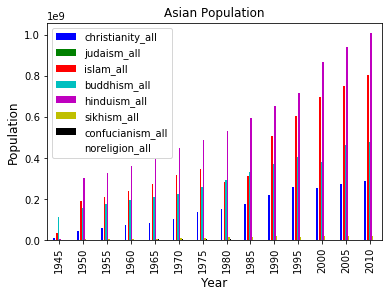

In [17]:
religionByAsia = religionAll[religionAll['region']=="Asia"]

religionByAsia.reset_index()

ax = religionByAsia[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="Asian Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByAfrica['year'])

# Europe

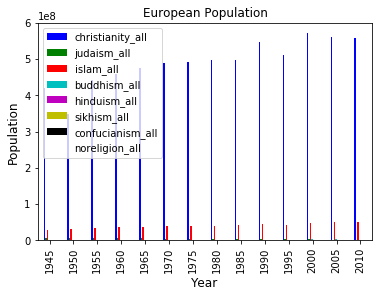

In [18]:
religionByEurope = religionAll[religionAll['region']=="Europe"]

religionByEurope.reset_index()

ax = religionByEurope[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="European Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByEurope['year'])


# Middle East

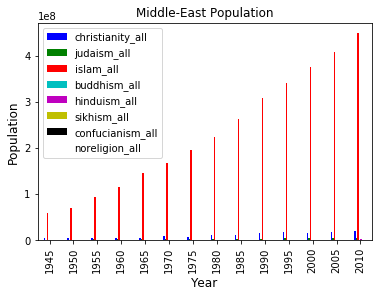

In [19]:
religionByMidEast = religionAll[religionAll['region']=="Mideast"]

religionByMidEast.reset_index()

ax = religionByMidEast[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="Middle-East Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByMidEast['year'])
plt.show()
# Reading from National.csv

Religion = pd.read_csv('./national.csv')
religionAll = Religion[['state','year','code','christianity_all','judaism_all','islam_all','buddhism_all','zoroastrianism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].copy() 


# India

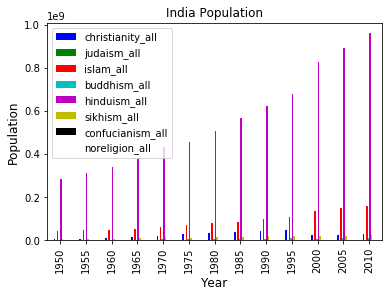

In [20]:
religionByCountry_India = religionAll[religionAll['state']=='India']

religionByCountry_India.reset_index()

ax = religionByCountry_India[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="India Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByCountry_India['year'])


# Pakistan

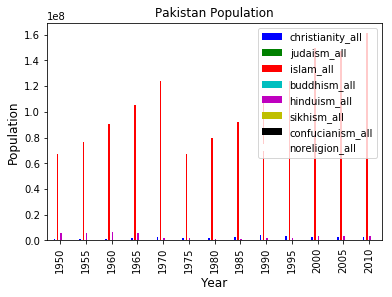

In [21]:
religionByCountry_Pak = religionAll[religionAll['state']=='Pakistan']

religionByCountry_Pak.reset_index()

ax = religionByCountry_Pak[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="Pakistan Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByCountry_Pak['year'])

# Saudi Arabia

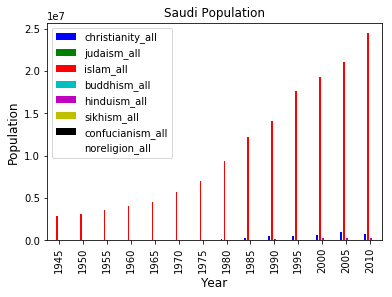

In [22]:
religionByCountry_Saudi = religionAll[religionAll['state']=='Saudi Arabia']
religionByCountry_Saudi.reset_index()

ax = religionByCountry_Saudi[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="Saudi Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByCountry_Saudi['year'])


# China

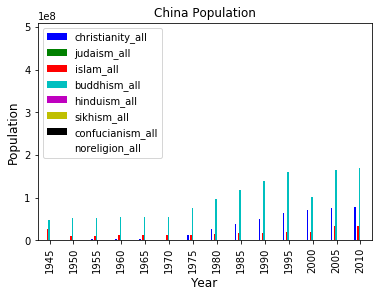

In [23]:
religionByCountry_China = religionAll[religionAll['state']=='China']
religionByCountry_China.reset_index()

ax = religionByCountry_China[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="China Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByCountry_China['year'])


# Russia

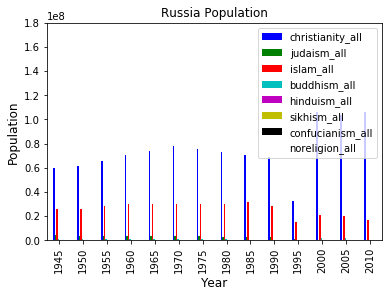

In [24]:
religionByCountry_Russia = religionAll[religionAll['state']=='Russia']
religionByCountry_Russia.reset_index()

ax = religionByCountry_Russia[['christianity_all','judaism_all','islam_all','buddhism_all','hinduism_all','sikhism_all','confucianism_all','noreligion_all']].plot(kind='bar', title ="Russia Population", color=colors)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticklabels(religionByCountry_Russia['year'])
plt.show()